### in this notebook we'll create a single_neuron network with a custom loss function. we'll go step by step, outputting the results after each step. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

define an arbitrary function that we'll use to generate data. in the end we'll check how close to the function coefficientts the NN gets its weights

In [2]:
def func(x1,x2):
    y = 5*x1 + 3*x2
    return y

number of rows in the dataset

In [3]:
nrows = 100

In [4]:
x1arr = np.random.rand(nrows)
x1arr

array([0.57411041, 0.8015355 , 0.17198151, 0.44474025, 0.06707421,
       0.54203418, 0.46284605, 0.13426832, 0.48400788, 0.9476267 ,
       0.86022998, 0.42711304, 0.39808714, 0.49385775, 0.83164289,
       0.18684465, 0.48727844, 0.9413823 , 0.97598106, 0.07596097,
       0.87328509, 0.26100527, 0.36207505, 0.00656183, 0.8857229 ,
       0.74361455, 0.01153856, 0.09582082, 0.05336272, 0.55261634,
       0.47259768, 0.03113753, 0.98021207, 0.41304082, 0.95301883,
       0.62893253, 0.90930869, 0.67553793, 0.62172847, 0.24181189,
       0.85676962, 0.65564256, 0.30473827, 0.58541967, 0.8714176 ,
       0.15242948, 0.93246007, 0.44046444, 0.0463154 , 0.72006505,
       0.78791267, 0.98599709, 0.97913744, 0.4816134 , 0.055213  ,
       0.76565861, 0.74841132, 0.08664741, 0.82488223, 0.27881387,
       0.92957659, 0.29353282, 0.69785391, 0.20502609, 0.36791088,
       0.67982722, 0.55590625, 0.38975501, 0.05743869, 0.78049501,
       0.01726224, 0.46012892, 0.00270561, 0.42848758, 0.49034

In [5]:
x2arr = np.random.randn(nrows)
x2arr

array([-0.60399118,  0.80029204, -0.20788452, -1.39582302,  0.81105018,
       -0.20034913, -1.2686938 , -0.80047814,  1.33853334,  0.08970284,
        1.04059414,  0.11524887,  1.85028743,  0.9775158 , -1.35438124,
       -0.72795116,  0.88430487,  0.3004772 , -0.11830901,  0.0144992 ,
        0.81924725, -0.21285771, -0.62317055, -0.73461234,  0.67655531,
        0.99787324,  0.15850468, -0.7317199 ,  1.33780415,  1.41527646,
       -0.8480453 ,  0.53296197,  0.13969885, -0.24571974,  0.89826801,
       -0.70154721, -1.06556901,  0.18624526,  0.66505208,  1.40013457,
       -0.15390777,  0.1717148 , -0.61430259,  2.43354246,  0.03435443,
       -0.16819335, -1.14490965,  1.19740009,  0.06786268,  1.37884089,
       -1.13168958,  1.94952818, -0.62503947, -2.13586222, -0.11524235,
       -1.89583854, -0.64398971, -1.04709337,  1.20282944, -0.3321969 ,
       -1.36432844, -1.8131004 , -0.4775738 ,  2.2569738 , -0.79432689,
        0.57237572, -0.39152255,  0.252886  , -0.01253508, -0.37

create the output using the created function

In [6]:
yarr = np.zeros_like(x1arr)
for i,(x1,x2) in enumerate(zip(x1arr, x2arr)):
    yarr[i] = func(x1,x2)

In [7]:
yarr

array([ 1.05857848,  6.40855366,  0.236254  , -1.96376779,  2.7685216 ,
        2.10912354, -1.49185114, -1.73009281,  6.43563943,  5.00724201,
        7.42293234,  2.48131183,  7.54129799,  5.40183617,  0.09507071,
       -1.24963024,  5.08930679,  5.60834309,  4.52497828,  0.42330247,
        6.82416718,  0.66645322, -0.05913638, -2.17102789,  6.4582804 ,
        6.71169248,  0.53320682, -1.71605559,  4.28022603,  7.00891111,
       -0.18114751,  1.75457358,  5.32015693,  1.32804489,  7.45989817,
        1.04002101,  1.34983641,  3.93642543,  5.1037986 ,  5.40946317,
        3.82212476,  3.79335722, -0.31921643, 10.22772574,  4.4601513 ,
        0.25756734,  1.22757141,  5.79452247,  0.43516502,  7.7368479 ,
        0.54449461, 10.77856998,  3.02056879, -3.99951966, -0.06966207,
       -1.85922254,  1.81008748, -2.70804305,  7.73289948,  0.39747866,
        0.55489762, -3.9716371 ,  2.05654816,  7.79605183, -0.54342628,
        5.11626325,  1.60496358,  2.70743305,  0.24958822,  2.77

In [8]:
import torch
import torch.nn as nn

define a single neuron NN without a non-linearity

In [9]:
class OneNeuron(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.fc1 = nn.Linear(num_features, 1)
        
    def forward(self, x):
        # let's try without a non-linearity
        x = self.fc1(x)
        
        return x
        

prepare the feature and label data. This is a regression problem (not classification)

In [10]:
num_features = 2

In [11]:
inp_features = [[xa,xb] for xa,xb in zip(x1arr, x2arr)]
inp_features

[[0.5741104077278066, -0.6039911845523377],
 [0.8015355048713688, 0.8002920447374073],
 [0.17198150889810926, -0.20788451585723258],
 [0.4447402542983734, -1.3958230205034383],
 [0.06707420983604728, 0.811050182384507],
 [0.5420341845124094, -0.20034912831362015],
 [0.4628460544007239, -1.2686938042311413],
 [0.13426832168888514, -0.8004781401448531],
 [0.48400788285282514, 1.3385333375176702],
 [0.9476266954739674, 0.0897028427085889],
 [0.8602299846509418, 1.0405941376244305],
 [0.4271130433597873, 0.1152488696554402],
 [0.398087136753157, 1.8502874345936142],
 [0.49385775490502926, 0.9775157998635293],
 [0.8316428864806942, -1.354381241335087],
 [0.18684464647746057, -0.7279511561551515],
 [0.4872784364315492, 0.8843048685931173],
 [0.9413822998553166, 0.3004771966333148],
 [0.975981058272199, -0.1183090052693603],
 [0.07596097114885536, 0.014499203465319318],
 [0.873285087226264, 0.8192472466452412],
 [0.26100526762552456, -0.21285770507509277],
 [0.3620750521551873, -0.62317054576

convert the arrays to pytorch tensors

In [12]:
inp_feat_tensor = torch.tensor(inp_features, dtype=torch.float32)
inp_feat_tensor

tensor([[ 5.7411e-01, -6.0399e-01],
        [ 8.0154e-01,  8.0029e-01],
        [ 1.7198e-01, -2.0788e-01],
        [ 4.4474e-01, -1.3958e+00],
        [ 6.7074e-02,  8.1105e-01],
        [ 5.4203e-01, -2.0035e-01],
        [ 4.6285e-01, -1.2687e+00],
        [ 1.3427e-01, -8.0048e-01],
        [ 4.8401e-01,  1.3385e+00],
        [ 9.4763e-01,  8.9703e-02],
        [ 8.6023e-01,  1.0406e+00],
        [ 4.2711e-01,  1.1525e-01],
        [ 3.9809e-01,  1.8503e+00],
        [ 4.9386e-01,  9.7752e-01],
        [ 8.3164e-01, -1.3544e+00],
        [ 1.8684e-01, -7.2795e-01],
        [ 4.8728e-01,  8.8430e-01],
        [ 9.4138e-01,  3.0048e-01],
        [ 9.7598e-01, -1.1831e-01],
        [ 7.5961e-02,  1.4499e-02],
        [ 8.7329e-01,  8.1925e-01],
        [ 2.6101e-01, -2.1286e-01],
        [ 3.6208e-01, -6.2317e-01],
        [ 6.5618e-03, -7.3461e-01],
        [ 8.8572e-01,  6.7656e-01],
        [ 7.4361e-01,  9.9787e-01],
        [ 1.1539e-02,  1.5850e-01],
        [ 9.5821e-02, -7.317

In [13]:
ytensor = torch.tensor(yarr, dtype=torch.float32)
ytensor

tensor([ 1.0586,  6.4086,  0.2363, -1.9638,  2.7685,  2.1091, -1.4919, -1.7301,
         6.4356,  5.0072,  7.4229,  2.4813,  7.5413,  5.4018,  0.0951, -1.2496,
         5.0893,  5.6083,  4.5250,  0.4233,  6.8242,  0.6665, -0.0591, -2.1710,
         6.4583,  6.7117,  0.5332, -1.7161,  4.2802,  7.0089, -0.1811,  1.7546,
         5.3202,  1.3280,  7.4599,  1.0400,  1.3498,  3.9364,  5.1038,  5.4095,
         3.8221,  3.7934, -0.3192, 10.2277,  4.4602,  0.2576,  1.2276,  5.7945,
         0.4352,  7.7368,  0.5445, 10.7786,  3.0206, -3.9995, -0.0697, -1.8592,
         1.8101, -2.7080,  7.7329,  0.3975,  0.5549, -3.9716,  2.0565,  7.7961,
        -0.5434,  5.1163,  1.6050,  2.7074,  0.2496,  2.7793,  1.3744,  0.6017,
         4.6530,  3.6105,  2.8517, -1.5216,  1.4301, -1.2587,  0.8350,  8.9402,
         5.8437,  3.1847,  3.2813,  1.5037,  0.1533,  3.0375, -2.1567, -0.7527,
         0.9394,  2.5421,  4.5012,  5.1628,  6.1915, 12.8055,  2.9905, -0.6094,
        -0.7913,  0.2312,  5.1787,  1.68

instantiate the model

In [14]:
model1 = OneNeuron(num_features)

In [15]:
model1

OneNeuron(
  (fc1): Linear(in_features=2, out_features=1, bias=True)
)

In [16]:
model1.parameters()

<generator object Module.parameters at 0x7f727255f350>

In [17]:
optimizer = torch.optim.Adam(model1.parameters())

In [18]:
model1.fc1.weight

Parameter containing:
tensor([[ 0.2281, -0.3076]], requires_grad=True)

make one forward pass

In [19]:
yhat = model1(inp_feat_tensor)
yhat

tensor([[ 0.5229],
        [ 0.1429],
        [ 0.3094],
        [ 0.7370],
        [-0.0279],
        [ 0.3915],
        [ 0.7020],
        [ 0.4831],
        [-0.0950],
        [ 0.3948],
        [ 0.0824],
        [ 0.2682],
        [-0.2720],
        [ 0.0182],
        [ 0.8125],
        [ 0.4727],
        [ 0.0454],
        [ 0.3285],
        [ 0.4652],
        [ 0.2191],
        [ 0.1535],
        [ 0.3312],
        [ 0.4805],
        [ 0.4337],
        [ 0.2002],
        [ 0.0689],
        [ 0.1601],
        [ 0.4531],
        [-0.1930],
        [-0.1030],
        [ 0.5749],
        [ 0.0494],
        [ 0.3868],
        [ 0.3760],
        [ 0.1473],
        [ 0.5655],
        [ 0.7414],
        [ 0.3030],
        [ 0.1435],
        [-0.1692],
        [ 0.4490],
        [ 0.3030],
        [ 0.4647],
        [-0.4087],
        [ 0.3944],
        [ 0.2927],
        [ 0.7710],
        [-0.0616],
        [ 0.1959],
        [-0.0536],
        [ 0.7340],
        [-0.1685],
        [ 0.

In [20]:
ytensor.shape

torch.Size([100])

In [21]:
yhat.shape

torch.Size([100, 1])

In [22]:
ytensor.unsqueeze(1).shape

torch.Size([100, 1])

In [23]:
(ytensor.unsqueeze(1) - yhat)**2

tensor([[2.8690e-01],
        [3.9258e+01],
        [5.3508e-03],
        [7.2940e+00],
        [7.8200e+00],
        [2.9503e+00],
        [4.8130e+00],
        [4.8980e+00],
        [4.2650e+01],
        [2.1275e+01],
        [5.3883e+01],
        [4.8978e+00],
        [6.1048e+01],
        [2.8983e+01],
        [5.1467e-01],
        [2.9666e+00],
        [2.5441e+01],
        [2.7876e+01],
        [1.6482e+01],
        [4.1696e-02],
        [4.4498e+01],
        [1.1237e-01],
        [2.9119e-01],
        [6.7845e+00],
        [3.9164e+01],
        [4.4126e+01],
        [1.3919e-01],
        [4.7054e+00],
        [2.0010e+01],
        [5.0579e+01],
        [5.7154e-01],
        [2.9075e+00],
        [2.4338e+01],
        [9.0635e-01],
        [5.3473e+01],
        [2.2521e-01],
        [3.7024e-01],
        [1.3201e+01],
        [2.4605e+01],
        [3.1122e+01],
        [1.1378e+01],
        [1.2183e+01],
        [6.1449e-01],
        [1.1313e+02],
        [1.6530e+01],
        [1

In [24]:
torch.mean((ytensor.unsqueeze(1) - yhat)**2)

tensor(18.3670, grad_fn=<MeanBackward0>)

calculate the loss

In [25]:
loss = torch.mean((ytensor.unsqueeze(1) - yhat)**2)
loss

tensor(18.3670, grad_fn=<MeanBackward0>)

make one backward pass

In [26]:
loss.backward()

check the weights and the gradients

In [27]:
model1.fc1.weight

Parameter containing:
tensor([[ 0.2281, -0.3076]], requires_grad=True)

In [28]:
model1.fc1.weight.grad

tensor([[-3.1999, -6.7806]])

now update the weights and check them again

In [29]:
optimizer.step()

In [30]:
model1.fc1.weight

Parameter containing:
tensor([[ 0.2291, -0.3066]], requires_grad=True)

the weights were updated. now zero the gradients and repeat the process

In [31]:
optimizer.zero_grad()

In [37]:
model1.fc1.weight.grad

tensor([[0., 0.]])

let's repeat the process a few times, keeping track of the loss and weights

In [38]:
epochs = 10000

In [39]:
model1.fc1.weight.detach().numpy().squeeze()[1]

-0.3065588

In [40]:
model1.fc1.bias.detach().numpy()[0]

0.20723945

In [41]:
running_w1 = []
running_w2 = []
running_loss = []
running_bias = []

for i in range(epochs):
    optimizer.zero_grad()
    output = model1(inp_feat_tensor)
    loss = torch.mean((ytensor.unsqueeze(1) - output)**2)
    
    w1 = model1.fc1.weight.detach().numpy().squeeze()[0]
    w2 = model1.fc1.weight.detach().numpy().squeeze()[1]
    b = model1.fc1.bias.detach().numpy()[0]
    running_loss.append(loss.item())
    running_w1.append(w1)
    running_w2.append(w2)
    running_bias.append(b)
    
    loss.backward()
    optimizer.step()
    
    if i%100 == 0:    
        print(f'epoch: {i}- loss: {loss}, w1: {w1}, w2: {w2}, b: {b}')
    

epoch: 0- loss: 18.352371215820312, w1: 0.22908762097358704, w2: -0.3065587878227234, b: 0.20723944902420044
epoch: 100- loss: 16.934349060058594, w1: 0.32812753319740295, w2: -0.20709985494613647, b: 0.3060736358165741
epoch: 200- loss: 15.614462852478027, w1: 0.4245207607746124, w2: -0.10912446677684784, b: 0.4016686975955963
epoch: 300- loss: 14.388248443603516, w1: 0.5182178616523743, w2: -0.012648692354559898, b: 0.4939144551753998
epoch: 400- loss: 13.250511169433594, w1: 0.6092401742935181, w2: 0.08235141634941101, b: 0.5827831625938416
epoch: 500- loss: 12.196252822875977, w1: 0.697608232498169, w2: 0.17589782178401947, b: 0.6682394742965698
epoch: 600- loss: 11.22065544128418, w1: 0.7833410501480103, w2: 0.2680106461048126, b: 0.7502408027648926
epoch: 700- loss: 10.319074630737305, w1: 0.8664572238922119, w2: 0.35870805382728577, b: 0.8287374973297119
epoch: 800- loss: 9.487022399902344, w1: 0.9469752907752991, w2: 0.4480062425136566, b: 0.9036740064620972
epoch: 900- loss: 8

epoch: 7700- loss: 0.01734006777405739, w1: 4.566699504852295, w2: 2.993229866027832, b: 0.2367454171180725
epoch: 7800- loss: 0.01447809673845768, w1: 4.60405158996582, w2: 2.993833303451538, b: 0.21628421545028687
epoch: 7900- loss: 0.011989239603281021, w1: 4.639673709869385, w2: 2.994399309158325, b: 0.1967822164297104
epoch: 8000- loss: 0.009841913357377052, w1: 4.673521041870117, w2: 2.9949347972869873, b: 0.17826193571090698
epoch: 8100- loss: 0.008004811592400074, w1: 4.705554485321045, w2: 2.9954402446746826, b: 0.1607426404953003
epoch: 8200- loss: 0.006447141058743, w1: 4.735743999481201, w2: 2.9959113597869873, b: 0.14423899352550507
epoch: 8300- loss: 0.0051389820873737335, w1: 4.764066219329834, w2: 2.9963531494140625, b: 0.12876199185848236
epoch: 8400- loss: 0.0040514362044632435, w1: 4.790509223937988, w2: 2.9967658519744873, b: 0.1143171489238739
epoch: 8500- loss: 0.00315709481947124, w1: 4.815067768096924, w2: 2.9971470832824707, b: 0.10090522468090057
epoch: 8600- 

Text(0.5, 1.0, 'loss vs epochs')

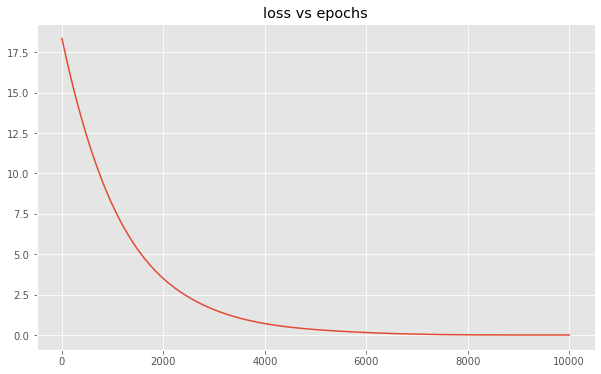

In [42]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(epochs), running_loss)
plt.title('loss vs epochs')

Text(0.5, 1.0, 'w1 over epochs. true w1 = 5')

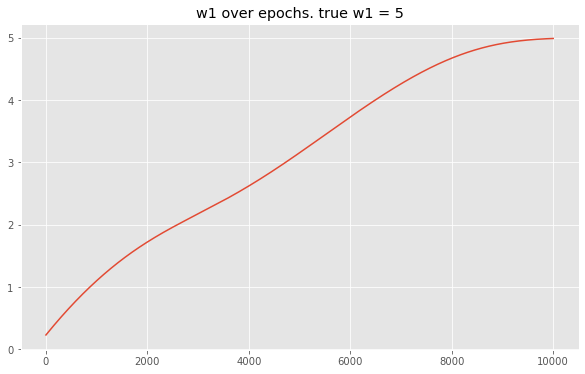

In [43]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(epochs), running_w1)
plt.title('w1 over epochs. true w1 = 5')

Text(0.5, 1.0, 'w2 over epochs. true w2 = 3')

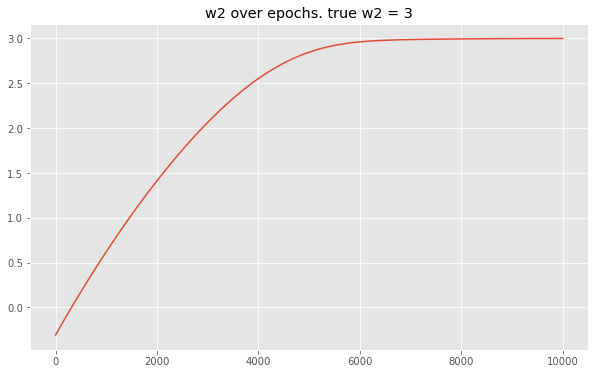

In [44]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(epochs), running_w2)
plt.title('w2 over epochs. true w2 = 3')

Text(0.5, 1.0, 'bias over epochs. true bias = 0')

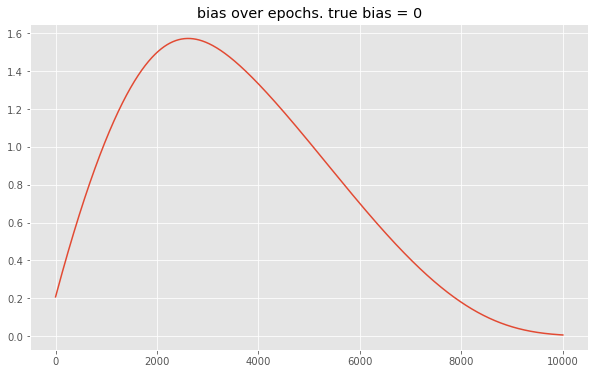

In [45]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(epochs), running_bias)
plt.title('bias over epochs. true bias = 0')

### inference

as we can see, it took around 6000 epochs to get the loss down to an acceptable level. as the function was linear, it took only one neuron to approximate it.

final weights:

In [39]:
model1.fc1.weight

Parameter containing:
tensor([[4.9688, 2.9984]], requires_grad=True)